In [ ]:
import cv2
import numpy
from matplotlib import pyplot as plt

In [18]:
# membaca gambar
img = cv2.imread('/home/furqan/Documents/Coding/TugasPengCit/INF509-PROJEK-PENGCIT/image/tugas02-face_blurring/image-sample.jpeg', 0)

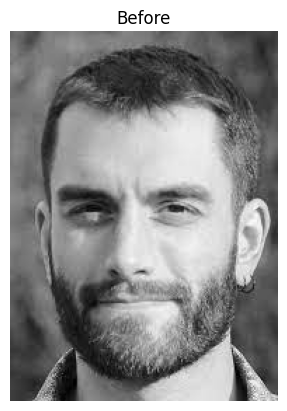

In [24]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Before")
plt.axis('off')
plt.show()

In [ ]:
blur_amount = int(request.args.get('amount', 0))
ksize = 2 * blur_amount + 1

# image_path = os.path.join(UPLOAD_FOLDER, 'uploaded.jpg')
# image = cv2.imread(image_path)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

faces = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

for (x, y, w, h) in faces:
    roi = img[y:y+h, x:x+w]
    roi = cv2.GaussianBlur(roi, (ksize, ksize), 30)
    img[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

output_path = os.path.join(UPLOAD_FOLDER, f'blurred_{blur_amount}.jpg')
cv2.imwrite(output_path, image)